In [1]:
from DataSplit import DataSplit

In [2]:
dataset_dir = "Crop-dataset"

In [3]:
data = DataSplit(datasetDir=dataset_dir)
data.get_combined_data()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,label,year
0,0.153184,0.222615,0.498528,0.611280,0.285032,0.112775,0.529626,0.546617,0.604374,0.571359,0.620985,0.496628,1,2021
1,0.137897,0.106036,0.169626,0.330396,0.594655,0.227967,0.578199,0.661604,0.783454,0.777313,0.729177,0.636792,1,2021
2,0.122481,0.088123,0.182121,0.376037,0.431042,0.350422,0.630027,0.724557,0.844643,0.673307,0.736385,0.635118,1,2021
3,0.085279,0.091887,0.140729,0.243528,0.224835,0.046875,0.579180,0.666857,0.611009,0.625423,0.612167,0.208681,1,2021
4,0.091678,0.094313,0.247900,0.367800,0.546883,0.476697,0.699308,0.768818,0.753445,0.711491,0.707040,0.647931,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,0.331873,0.637595,0.860933,0.936457,0.771076,0.402954,0.884208,0.515337,0.851545,0.908714,0.895963,0.858908,0,2023
915,0.333794,0.621409,0.841538,0.909154,0.736736,0.384046,0.886665,0.485586,0.846778,0.907973,0.904183,0.876847,0,2023
916,0.373900,0.618582,0.856424,0.903326,0.781238,0.375578,0.889700,0.532434,0.844510,0.911383,0.905652,0.899614,0,2023
917,0.349008,0.556529,0.855942,0.925486,0.800000,0.347044,0.895157,0.473819,0.812193,0.904762,0.899269,0.903632,0,2023


In [4]:
data.combined_data

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,label,year
0,0.153184,0.222615,0.498528,0.611280,0.285032,0.112775,0.529626,0.546617,0.604374,0.571359,0.620985,0.496628,1,2021
1,0.137897,0.106036,0.169626,0.330396,0.594655,0.227967,0.578199,0.661604,0.783454,0.777313,0.729177,0.636792,1,2021
2,0.122481,0.088123,0.182121,0.376037,0.431042,0.350422,0.630027,0.724557,0.844643,0.673307,0.736385,0.635118,1,2021
3,0.085279,0.091887,0.140729,0.243528,0.224835,0.046875,0.579180,0.666857,0.611009,0.625423,0.612167,0.208681,1,2021
4,0.091678,0.094313,0.247900,0.367800,0.546883,0.476697,0.699308,0.768818,0.753445,0.711491,0.707040,0.647931,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,0.331873,0.637595,0.860933,0.936457,0.771076,0.402954,0.884208,0.515337,0.851545,0.908714,0.895963,0.858908,0,2023
915,0.333794,0.621409,0.841538,0.909154,0.736736,0.384046,0.886665,0.485586,0.846778,0.907973,0.904183,0.876847,0,2023
916,0.373900,0.618582,0.856424,0.903326,0.781238,0.375578,0.889700,0.532434,0.844510,0.911383,0.905652,0.899614,0,2023
917,0.349008,0.556529,0.855942,0.925486,0.800000,0.347044,0.895157,0.473819,0.812193,0.904762,0.899269,0.903632,0,2023


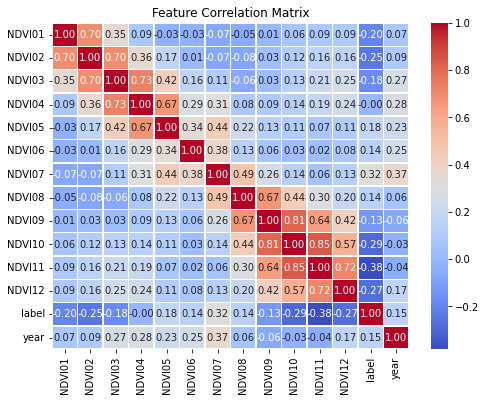

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate correlation matrix
correlation_matrix = data.combined_data.corr()

# Step 2: Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [6]:
data.combined_data = data.combined_data.drop(columns=['NDVI10'])

# Calling Preprocessing

In [7]:
from Data_Processing import DataPreProcess
dp=DataPreProcess()

The null in dataset are:
 NDVI01    0
NDVI02    0
NDVI03    0
NDVI04    0
NDVI05    0
NDVI06    0
NDVI07    0
NDVI08    0
NDVI09    0
NDVI10    0
NDVI11    0
NDVI12    0
label     0
year      0
dtype: int64
As there is no Null in Dataset so no removal us needed

Now we will check for the correlation in dataset



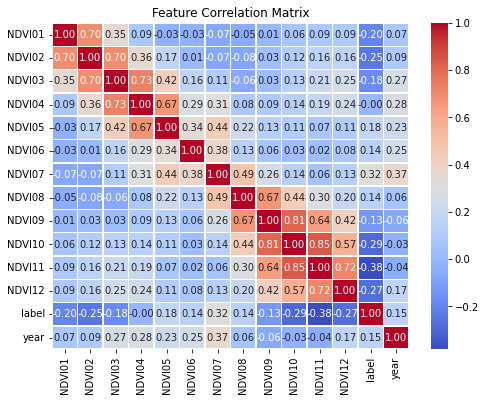

As NDVI10 is highly correlated with NDVI11 and NDVI09
So we will drop it

     NDVI01    NDVI02    NDVI03    NDVI04    NDVI05    NDVI06    NDVI07  \
0  0.153184  0.222615  0.498528  0.611280  0.285032  0.112775  0.529626   
1  0.137897  0.106036  0.169626  0.330396  0.594655  0.227967  0.578199   
2  0.122481  0.088123  0.182121  0.376037  0.431042  0.350422  0.630027   
3  0.085279  0.091887  0.140729  0.243528  0.224835  0.046875  0.579180   
4  0.091678  0.094313  0.247900  0.367800  0.546883  0.476697  0.699308   

     NDVI08    NDVI09    NDVI11    NDVI12  label  year  
0  0.546617  0.604374  0.620985  0.496628      1  2021  
1  0.661604  0.783454  0.729177  0.636792      1  2021  
2  0.724557  0.844643  0.736385  0.635118      1  2021  
3  0.666857  0.611009  0.612167  0.208681      1  2021  
4  0.768818  0.753445  0.707040  0.647931      1  2021  
Splitting the data:

Training Dataset of year 2022 and 2023:
Cotton samples: 24188
Rice samples: 5606
Testing Dataset of year 2021:
C

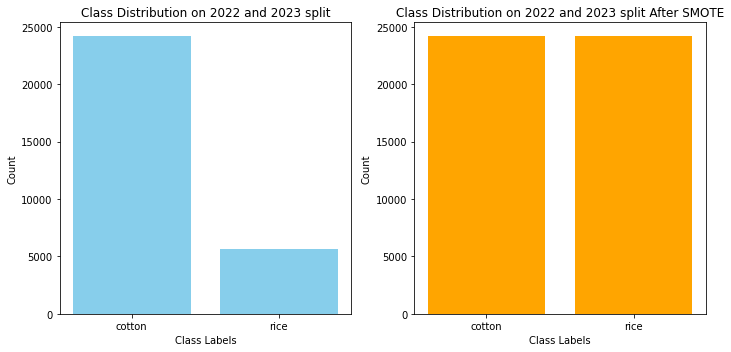

Original class distribution: Counter({1: 24188, 0: 5606})
New class distribution after SMOTE: Counter({1: 24188, 0: 24188})
Total samples after augmentation: 48376


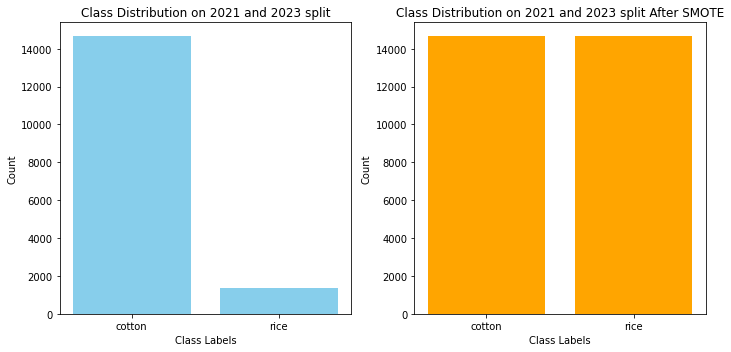

Original class distribution: Counter({1: 14660, 0: 1338})
New class distribution after SMOTE: Counter({1: 14660, 0: 14660})
Total samples after augmentation: 29320


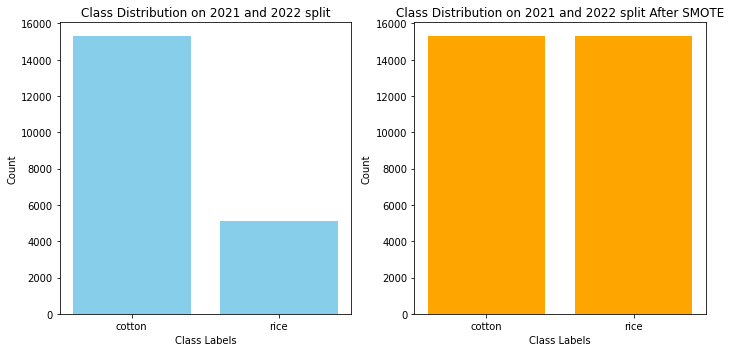

Original class distribution: Counter({1: 15294, 0: 5106})
New class distribution after SMOTE: Counter({1: 15294, 0: 15294})
Total samples after augmentation: 30588


In [8]:
data=dp.apply_preprocessing()

In [9]:
from supervisedModels.RandomForrest import RandomForrest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [20],
    'min_samples_leaf': [4],
}
#     param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_ `split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'bootstrap': [True, False],
#     'criterion': ['gini', 'entropy']
# }


RF = RandomForrest(data=data, param_grid=param_grid)
RF.get_best_hyperparameters()



Results on testing set 2021


KeyboardInterrupt: 



individual scroe:                                               params  weighted_f1  accuracy  \
1  {'criterion': 'gini', 'max_depth': 20, 'max_fe...     0.849980  0.835554   
3  {'criterion': 'gini', 'max_depth': 20, 'max_fe...     0.874561  0.881858   
5  {'criterion': 'gini', 'max_depth': 20, 'max_fe...     0.878885  0.848850   

   precision    recall        f1              confusion_matrix  \
1   0.941509  0.865418  0.901862     [[264, 155], [388, 2495]]   
3   0.875859  0.975506  0.923001  [[2971, 1716], [304, 12107]]   
5   0.986575  0.848603  0.912402    [[783, 136], [1783, 9994]]   

                               classification_report  \
1                precision    recall  f1-score   ...   
3                precision    recall  f1-score   ...   
5                precision    recall  f1-score   ...   

                                          params_str  
1  {'criterion': 'gini', 'max_depth': 20, 'max_fe...  
3  {'criterion': 'gini', 'max_depth': 20, 'max_fe...  
5  {'cri

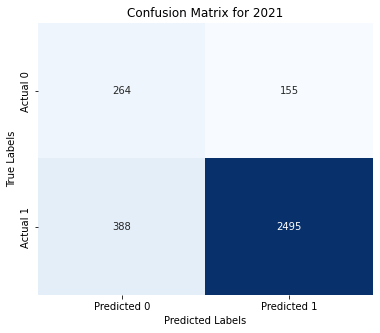

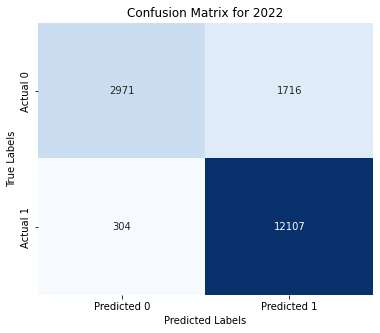

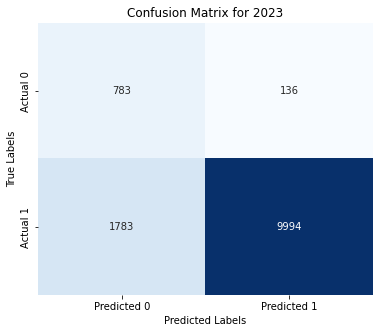

In [ ]:
RF.get_test_results()

In [10]:
from supervisedModels.Bagging import Bagging
param_grid = {
    "n_estimators": [10, 50],  # Number of base estimators
    "max_samples": [0.5],    # Fraction of samples used to train each base estimator
    "max_features": [0.5],   # Fraction of features used in each base estimator
}
# param_grid = {
#     "n_estimators": [10, 50, 100, 200],  # Number of base estimators
#     "max_samples": [0.5, 0.75, 1.0],    # Fraction of samples used to train each base estimator
#     "max_features": [0.5, 0.75, 1.0],   # Fraction of features used in each base estimator
#     "bootstrap": [True, False],         # Whether to use sampling with replacement
#     "bootstrap_features": [True, False],  # Whether features are sampled with replacement
#     "base_estimator": [None],           # Defaults to decision tree; can also try other estimators
#     "random_state": [42]                # Fixed random seed for reproducibility
# }

bagging = Bagging(data=data, param_grid=param_grid)
bagging.get_best_hyperparameters()



Results on testing set 2021
params: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 10}

weighted_f1: 0.8553307744270484

accuracy: 0.8446396123561478

precision: 0.9366249078850405

recall: 0.8817204301075269

f1: 0.9083437555833482

confusion_matrix: [[ 247  172]
 [ 341 2542]]

classification_report:               precision    recall  f1-score   support

        rice       0.42      0.59      0.49       419
      cotton       0.94      0.88      0.91      2883

    accuracy                           0.84      3302
   macro avg       0.68      0.74      0.70      3302
weighted avg       0.87      0.84      0.86      3302




KeyboardInterrupt: 



individual scroe:                                               params  weighted_f1  accuracy  \
1  {'max_features': 0.5, 'max_samples': 0.5, 'n_e...     0.878962  0.874319   
3  {'max_features': 0.5, 'max_samples': 0.5, 'n_e...     0.866937  0.876301   
5  {'max_features': 0.5, 'max_samples': 0.5, 'n_e...     0.883921  0.856490   

   precision    recall        f1              confusion_matrix  \
1   0.940400  0.913978  0.927001     [[252, 167], [248, 2635]]   
3   0.866093  0.981307  0.920107  [[2804, 1883], [232, 12179]]   
5   0.984711  0.858623  0.917355   [[762, 157], [1665, 10112]]   

                               classification_report  \
1                precision    recall  f1-score   ...   
3                precision    recall  f1-score   ...   
5                precision    recall  f1-score   ...   

                                          params_str  
1  {'max_features': 0.5, 'max_samples': 0.5, 'n_e...  
3  {'max_features': 0.5, 'max_samples': 0.5, 'n_e...  
5  {'max

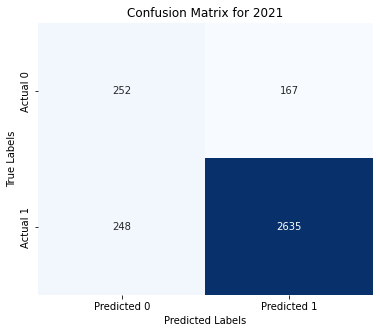

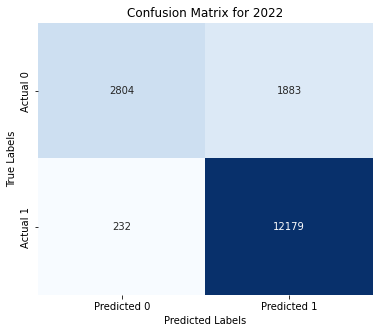

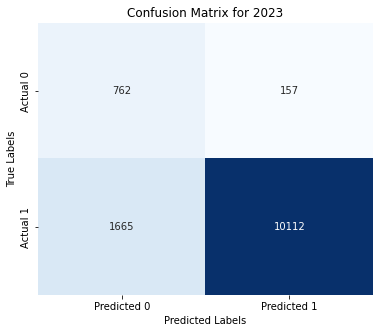

In [ ]:
bagging.get_test_results()

In [ ]:
from supervisedModels.SVM import SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto'],
}
#     param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'degree': [3, 4, 5],
#     'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
#     'coef0': [0, 0.5, 1, 2],
#     'tol': [1e-3, 1e-4, 1e-5],
#     'max_iter': [-1, 1000, 2000]
# }

svm = SVM(data=data, param_grid=param_grid)
svm.get_best_hyperparameters()



Results on testing set 2021
params: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}

weighted_f1: 0.6368106445375422

accuracy: 0.56480920654149

precision: 0.9103291713961408

recall: 0.5563648976760319

f1: 0.6906350914962325

confusion_matrix: [[ 261  158]
 [1279 1604]]

classification_report:               precision    recall  f1-score   support

        rice       0.17      0.62      0.27       419
      cotton       0.91      0.56      0.69      2883

    accuracy                           0.56      3302
   macro avg       0.54      0.59      0.48      3302
weighted avg       0.82      0.56      0.64      3302


params: {'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}

weighted_f1: 0.9129955589059594

accuracy: 0.920351302241066

precision: 0.9326287978863936

recall: 0.9795352063822407

f1: 0.9555066824564371

confusion_matrix: [[ 215  204]
 [  59 2824]]

classification_report:               precision    recall  f1-score   support

        rice       0.78      0.51      0.62 



individual scroe:                                               params  weighted_f1  accuracy  \
0  {'C': 0.01, 'coef0': 2, 'degree': 3, 'gamma': ...     0.841630  0.878256   
2  {'C': 0.01, 'coef0': 2, 'degree': 3, 'gamma': ...     0.696903  0.724822   
4  {'C': 0.01, 'coef0': 2, 'degree': 3, 'gamma': ...     0.886050  0.902016   

   precision    recall        f1               confusion_matrix  \
0   0.885848  0.987860  0.934077        [[52, 367], [35, 2848]]   
2   0.766533  0.892837  0.824878  [[1312, 3375], [1330, 11081]]   
4   0.929953  0.967224  0.948223      [[61, 858], [386, 11391]]   

                               classification_report  \
0                precision    recall  f1-score   ...   
2                precision    recall  f1-score   ...   
4                precision    recall  f1-score   ...   

                                          params_str  
0  {'C': 0.01, 'coef0': 2, 'degree': 3, 'gamma': ...  
2  {'C': 0.01, 'coef0': 2, 'degree': 3, 'gamma': ...  
4  {

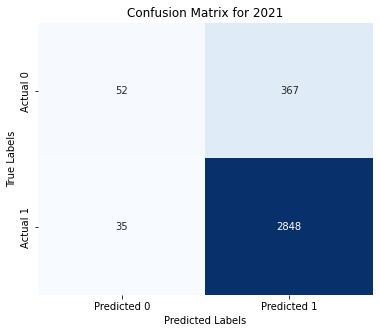

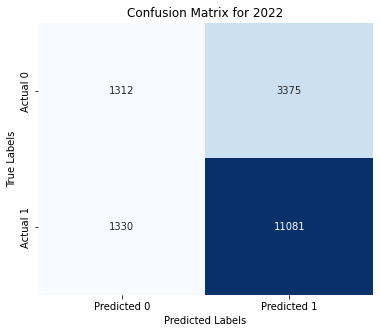

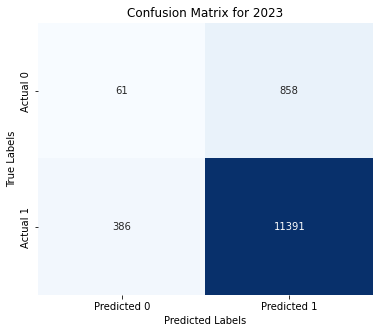

In [ ]:
svm.get_test_results()

In [ ]:
from supervisedModels.XGBoost import XGBoost
param_grid = {
    'n_estimators': [200, 500],
    'learning_rate': [0.2],
    'max_depth': [10],
}
# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'max_depth': [3, 5, 6, 10],
#     'min_child_weight': [1, 3, 5, 10],
#     'subsample': [0.6, 0.7, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'colsample_bylevel': [0.6, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.5, 1],
#     'scale_pos_weight': [1, 2, 5, 10],
#     'reg_alpha': [0, 0.01, 0.1, 1],
#     'reg_lambda': [0, 0.01, 0.1, 1],
#     'objective': ['binary:logistic', 'multi:softmax'],
#     'booster': ['gbtree', 'dart'],
#     'tree_method': ['auto', 'hist', 'gpu_hist']
# }
xg = XGBoost(data=data, param_grid=param_grid)
xg.get_best_hyperparameters()



Results on testing set 2021
params: {'colsample_bylevel': 1.0, 'colsample_bytree': 1.0, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 200, 'reg_alpha': 1, 'reg_lambda': 1, 'scale_pos_weight': 10, 'subsample': 1.0}

weighted_f1: 0.8926531723198484

accuracy: 0.8924894003634161

precision: 0.9388888888888889

recall: 0.937911897329171

f1: 0.9384001388165887

confusion_matrix: [[ 243  176]
 [ 179 2704]]

classification_report:               precision    recall  f1-score   support

        rice       0.58      0.58      0.58       419
      cotton       0.94      0.94      0.94      2883

    accuracy                           0.89      3302
   macro avg       0.76      0.76      0.76      3302
weighted avg       0.89      0.89      0.89      3302


params: {'colsample_bylevel': 1.0, 'colsample_bytree': 1.0, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 1, 'scale_

{'colsample_bylevel': 1.0,
 'colsample_bytree': 1.0,
 'gamma': 1,
 'learning_rate': 0.2,
 'max_depth': 10,
 'min_child_weight': 10,
 'n_estimators': 200,
 'reg_alpha': 1,
 'reg_lambda': 1,
 'scale_pos_weight': 10,
 'subsample': 1.0}



individual scroe:                                               params  weighted_f1  accuracy  \
0  {'colsample_bylevel': 1.0, 'colsample_bytree':...     0.892653  0.892489   
2  {'colsample_bylevel': 1.0, 'colsample_bytree':...     0.818677  0.838051   
4  {'colsample_bylevel': 1.0, 'colsample_bytree':...     0.904452  0.886578   

   precision    recall        f1              confusion_matrix  \
0   0.938889  0.937912  0.938400     [[243, 176], [179, 2704]]   
2   0.827870  0.980823  0.897879  [[2156, 2531], [238, 12173]]   
4   0.981373  0.894710  0.936040   [[719, 200], [1240, 10537]]   

                               classification_report  \
0                precision    recall  f1-score   ...   
2                precision    recall  f1-score   ...   
4                precision    recall  f1-score   ...   

                                          params_str  
0  {'colsample_bylevel': 1.0, 'colsample_bytree':...  
2  {'colsample_bylevel': 1.0, 'colsample_bytree':...  
4  {'col

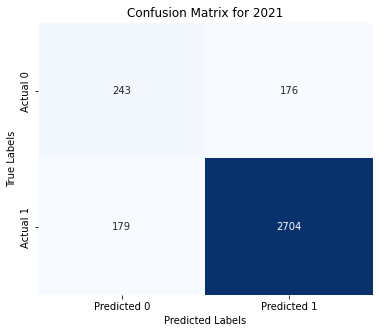

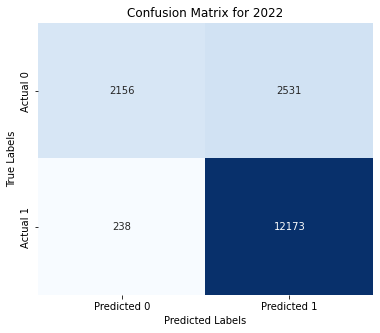

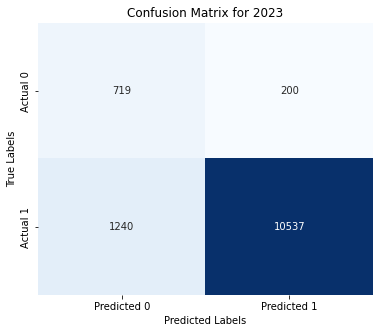

In [16]:
xg.get_test_results()